## Generating acquisition models

In [1]:
import numpy as np
import random
import json

Notes: 
control test produces a model that runs but no transactions after t = 8 :( 
    > increased max inventory capcacity for enrichment facility, solved this issue 
only traded commodity is c_uore
   

In [2]:
class Simulation: 
    
    #diversion = True if random.randint(0,1) == 1 else False
    
    def __init__(self, control, archetypes, facility, region, recipe): 
        self.control = control
        self.archetypes = {"spec": archetypes}
        self.facility = facility
        self.region = region
        self.recipe = recipe 
    
    def add_archetype(library, name):
        self.archetypes.append({"lib": library, "name": name})
        
    def add_facility(name, config):
        self.facility.append({"name": name, "config": config})
        
    def add_recipe(recipe): 
        self.recipe.append(recipe)
    
    def to_string(self):
        out = "simulation: \n"
        out += "control: " + str(self.control) + "\n"
        out += "archetypes: " + str(self.archetypes) + "\n"
        out += "facility: " + str(self.facility) + "\n"
        out += "region: " + str(self.region) + "\n"
        out += "recipe: " + str(self.recipe) + "\n"
        return out
    
    def simulation(self):
        sim = {"simulation": 
           {"control": self.control, 
            "archetypes": {"spec": self.archetypes}, 
            "facility": self.facility, 
            "region": self.region, 
            "recipe": self.recipe}}
        return sim
        
    

### Control

In [3]:
#set default parameters for simulation 
default_control = {"duration": "144", "startmonth": "1", "startyear": "2019",
                   "decay": "never", "explicit_inventory": "true"}
default_archetypes = [{"lib": "cycamore","name": "Enrichment"},
                      {"lib": "cycamore","name": "Reactor"}, 
                           {"lib": "cycamore","name": "Source"},
                           {"lib": "cycamore","name": "Sink"},
                           {"lib": "agents","name": "NullRegion"},
                           {"lib": "agents", "name": "NullInst"}]

tp = random.gauss(10000, 10) #between 60 and 140 tons     
l_swu = random.gauss(420000, 1000) 
l_maxfeed = 10000

default_facilities = [
        {
            "name": "UraniumMine",
            "config": {
               "Source": {
                  "outcommod": "c_uore",
                  "outrecipe": "r_nat_u",
                  "throughput": str(tp)
               }
            }
         },
        {
            "name": "LEUEnrichmentFacility",
            "config": {
               "Enrichment": {
                  "feed_commod": "c_uore",
                  "feed_recipe": "r_nat_u",
                  "product_commod": "c_leu",
                  "tails_commod": "c_spent_leu",
                  "swu_capacity": "100000", #str(l_swu),
                  "max_feed_inventory": str(l_maxfeed),
                  "max_enrich": "0.041",
                  "initial_feed": "0"
               }
            }
         },
        {
            "name": "LWR",
            "config": {"Reactor": {
                  "fuel_incommods": {"val": "c_leu"},
                  "fuel_inrecipes": {"val": "r_leu"}, 
                  "fuel_outcommods": {"val": "c_spent_leu"},
                  "fuel_outrecipes": {"val": "r_leu_spent"}, 
                  "cycle_time": "18",
                  "refuel_time": "1",
                  "assem_size": "295",
                  "n_assem_core": "3",
                  "n_assem_batch": "1",
                  "power_cap": "90" ,
               }
               }}, 
        {
            "name": "SpentFuelSink",
            "config": {
               "Sink": {
                  "in_commods": {
                     "val": "c_spent_leu"
                  }
               }
            }
         }
            ]

def set_institution(facilities):
    institution = {"name": "inst", "initialfacilitylist": {"entry": []},
                   "config": {"NullInst": None}}
    for facility in facilities:
        institution["initialfacilitylist"]["entry"].append(
            {"number": 1, "prototype": facility["name"]}
        )    
    return institution

default_region = {"name": "MyRegion", "config": {"NullRegion": None}, "institution": set_institution(default_facilities)}
default_recipes = [{"name": "r_nat_u", "basis": "mass",
                         "nuclide": [{"id": "92235", "comp": "0.00711"},
                                     {"id": "92238", "comp": "0.99289"}]},
                        {"name": "r_heu", "basis": "mass",
                         "nuclide": [{"id": "92235", "comp": "0.9"},
                                     {"id": "92238", "comp": "0.1"}]},
                        {"name": "r_leu", "basis": "mass",
                         "nuclide": [{"id": "92235","comp": "0.04"},
                                     {"id": "92238", "comp": "0.96"}]},
                    {"name": "r_leu_spent", "basis": "mass", 
                    "nuclide": [{"id": "92235", "comp": "0.01"},
                                {"id": "92238", "comp": "0.94"},
                                {"id": "94239", "comp": "0.01"},
                                {"id": "55135", "comp": "0.3"}]}]

In [4]:
def write_input(simulation, filename):
    with open (filename, "w") as outfile:
        text = "simulation = " + str(simulation)
        outfile.write(text)
    outfile.close
    
def write_json(simulation, filename):
    with open (filename, 'w') as writeout:
        json.dump(simulation, writeout)

In [5]:
default = Simulation(default_control, default_archetypes, default_facilities, default_region, default_recipes)
#print(default.diversion)
print(default.to_string())




simulation: 
control: {'duration': '144', 'startmonth': '1', 'startyear': '2019', 'decay': 'never', 'explicit_inventory': 'true'}
archetypes: {'spec': [{'lib': 'cycamore', 'name': 'Enrichment'}, {'lib': 'cycamore', 'name': 'Reactor'}, {'lib': 'cycamore', 'name': 'Source'}, {'lib': 'cycamore', 'name': 'Sink'}, {'lib': 'agents', 'name': 'NullRegion'}, {'lib': 'agents', 'name': 'NullInst'}]}
facility: [{'name': 'UraniumMine', 'config': {'Source': {'outcommod': 'c_uore', 'outrecipe': 'r_nat_u', 'throughput': '10006.469906504619'}}}, {'name': 'LEUEnrichmentFacility', 'config': {'Enrichment': {'feed_commod': 'c_uore', 'feed_recipe': 'r_nat_u', 'product_commod': 'c_leu', 'tails_commod': 'c_spent_leu', 'swu_capacity': '100000', 'max_feed_inventory': '10000', 'max_enrich': '0.041', 'initial_feed': '0'}}}, {'name': 'LWR', 'config': {'Reactor': {'fuel_incommods': {'val': 'c_leu'}, 'fuel_inrecipes': {'val': 'r_leu'}, 'fuel_outcommods': {'val': 'c_spent_leu'}, 'fuel_outrecipes': {'val': 'r_leu_spen

In [6]:
test_control = write_input({"simulation": vars(default)}, "control_test.py")

print(vars(default))

{'control': {'duration': '144', 'startmonth': '1', 'startyear': '2019', 'decay': 'never', 'explicit_inventory': 'true'}, 'archetypes': {'spec': [{'lib': 'cycamore', 'name': 'Enrichment'}, {'lib': 'cycamore', 'name': 'Reactor'}, {'lib': 'cycamore', 'name': 'Source'}, {'lib': 'cycamore', 'name': 'Sink'}, {'lib': 'agents', 'name': 'NullRegion'}, {'lib': 'agents', 'name': 'NullInst'}]}, 'facility': [{'name': 'UraniumMine', 'config': {'Source': {'outcommod': 'c_uore', 'outrecipe': 'r_nat_u', 'throughput': '10006.469906504619'}}}, {'name': 'LEUEnrichmentFacility', 'config': {'Enrichment': {'feed_commod': 'c_uore', 'feed_recipe': 'r_nat_u', 'product_commod': 'c_leu', 'tails_commod': 'c_spent_leu', 'swu_capacity': '100000', 'max_feed_inventory': '10000', 'max_enrich': '0.041', 'initial_feed': '0'}}}, {'name': 'LWR', 'config': {'Reactor': {'fuel_incommods': {'val': 'c_leu'}, 'fuel_inrecipes': {'val': 'r_leu'}, 'fuel_outcommods': {'val': 'c_spent_leu'}, 'fuel_outrecipes': {'val': 'r_leu_spent'},

In [7]:
import cymetric as cym
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (40,24)
from cymetric import graphs as cgr
from cymetric import timeseries as tm
from cymetric import filters as fl

In [8]:
# file = "test9.sqlite"
# db = cym.dbopen(file)
# ev = cym.Evaluator(db=db, write=True)


In [9]:
#cym.graphs.flow_graph(ev)

### Hider

The hider's objective is to acquire nuclear weapons before they are discovered. (South Africa, Iran, Iraq, North Korea) In this implementation, hiders divert as much nuclear material as they can within a given margin of error. 

In [10]:
h_new_fac = [{
            "name": "HEUenrich",
            "config": {
               "Enrichment": {
                  "feed_commod": "c_uore",
                  "feed_recipe": "r_nat_u",
                  "product_commod": "c_heu",
                  "tails_commod": "heu_tails",
                  "swu_capacity": str(l_swu),
                  "max_feed_inventory": str(l_maxfeed),
                  "max_enrich": "0.9",
                  "initial_feed": "0"
               }
            }
         },
        {
            "name": "LEUtoHEUenrich",
            "config": {
               "Enrichment": {
                  "feed_commod": "c_leu_spent",
                  "feed_recipe": "r_leu_spent",
                  "product_commod": "c_heu",
                  "tails_commod": "c_heu_tails",
                  "swu_capacity": str(l_swu/2.),
                  "max_feed_inventory": str(l_maxfeed),
                  "max_enrich": "0.9",
                  "initial_feed": "0"
               }
            }
         },
#             {
#             "name": "PuProcessing",
#             "config": {
#                "Separations": {
#                   "feed_commod": "c_leu_spent",
#                   "feed_recipe": "r_leu_spent",
#                   "feedbuf_size": "1000", 
#                   "throughput": "8", 
#                 "streams": {
#                     "item": [{
#                         "commod": "c_pu",
#                         "info": {
#                             "buf_size": "100",
#                             "efficiencies": {
#                                 "item": [{"comp": "94239", "eff": 0.8}]
#                             }}}]}}}
                    
        
#          },
         
    {
            "name": "HEUSink",
            "config": {
               "Sink": {
                  "in_commods": {
                     "val": "c_heu"
                  }
               }
            }
         },         
#     {
#             "name": "PuSink",
#             "config": {
#                "Sink": {
#                   "in_commods": {
#                      "val": "c_pu"
#                   }
#                }
#             }
#          }
    


]
hider_facilities = default_facilities + h_new_fac
hider_archetypes = default_archetypes + [{"lib": "cycamore", "name": "Reactor"}, 
                                             {"lib": "cycamore", "name": "Separations"}]
hider_region = {"name": "MyRegion", "config": {"NullRegion": None}, "institution": set_institution(hider_facilities)}


#hider_recipes = default_recipes.extend(hider_new_recipes)

In [11]:
def hider(cl, filename): 
    #manipulates input based on given confidence level cl
    sim = Simulation(default_control, hider_archetypes, hider_facilities, hider_region, default_recipes)
    #things to mutate: 
    #mine throughput
    mine_throughput = float(sim.facility[0]["config"]["Source"]["throughput"])
    new_throughput = (mine_throughput * cl) #what do do with excess? 
    extra_throughput = (mine_throughput * (1-cl))
    sim.facility[0]["config"]["Source"]["throughput"] = new_throughput 
    sim.facility[4]["config"]["Enrichment"]["max_feed_inventory"] = extra_throughput
    
    #enrichment swus (we'll circle back to this)
#     enrich_swu = float(sim.facilities[1]["config"]["Enrichment"]["swu_capacity"]) 
#     new_swu = (enrich_swu * cl)
#     sim.facilities[1]["config"]["Enrichment"]["swu_capacity"] = new_swu
    
    #processing feedbuf size
    #feedbuf_size = sim.facilities[6]["config"]["Separations"]["feedbuf_size"] = ?
    #print(sim.to_string())
    #print(vars(sim))
    
    sim_in = {"simulation": vars(sim)}
    print(sim_in)
    write_input(sim_in, filename)
    return sim

In [12]:
#test_hider = hider(0.9, "test_hider.py")


In [13]:
clean_sim = Simulation(default_control, hider_archetypes, hider_facilities, hider_region, default_recipes)
clean_hider = {"simulation": vars(clean_sim)}
write_input(clean_hider, "clean_sim.py")


In [14]:
#print([fac for fac in default_facilities])
#print(hider_facilities)
#print (test_hider.to_string())

In [15]:
hider_file = "0309base.sqlite" #clean_test.sqlite
db = cym.dbopen(hider_file)
ev = cym.Evaluator(db=db, write=True)

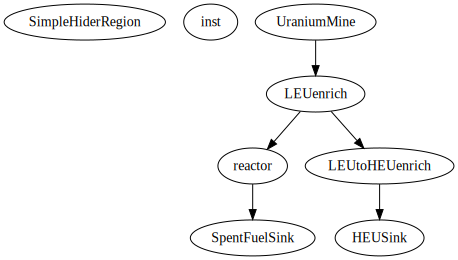

In [16]:
cym.graphs.flow_graph(ev)

### Sprinter

The sprinter's objective is to acquire nuclear weapons as quickly as possible. (United States, Soviet Union, United Kindom, India) In this implementation, sprinters start diverting all of their nuclear material after a given time step. 

In [17]:
#show diagram using cymetric 

In [18]:

# def sprinter():
#     t0 = random.randint(0,144)
    

In [19]:
# #more_archetypes = default_archetypes.extend([{"lib": "mbmore", "name": "RandomEnrich"}, 
#                                              #{"lib": "mbmore", "name": "RandomSink"}])
# default_heu = []
# default_pu = []

# def make_hider(moe, heu_facilities=default_heu, pu_facilities=default_pu, archetypes=more_archetypes):
#     sim = Simulation(default_control, default_archetypes, default_facilities, default_region, default_recipies)
#     print(sim.to_string())
#     #extract throughput data
#     mine_throughput = float(sim.facilities[0]["config"]["Source"]["throughput"])
#     enrich_swu = float(sim.facilities[1]["config"]["Enrichment"]["swu_capacity"])    
#     #manipulate
#     new_throughput = (mine_throughput * moe)
#     new_swu = (enrich_swu * moe)
#     #mine_diverted = mine_throughput - new_throughput
#     #enrich_diverted = enrich_swu - new_swu
#     sim.facilities[0]["config"]["Source"]["throughput"] = new_throughput 
#     sim.facilities[1]["config"]["Enrichment"]["swu_capacity"] = new_swu
#     print(sim.to_string())
    
    
#     #sim.add_archetypes([arche for arche in more_archetypes])
#     #sim.add_facility([fac for fac in heu_facilities])
#     #sim.add_facility([fac for fac in pu_facilities])

#     return sim

# make_hider(0.95) 